# Importando as bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE

# Importanto o dataset

In [2]:
# Abrindo o dataset e visualizando as 5 primeiras linhas

arquivo = pd.read_csv('rh_analytics.csv')
arquivo.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


# Análise exploratória do dataset

### Visualizando o nome das colunas

In [3]:
print(arquivo.columns)

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary'],
      dtype='object')


* satisfaction_level: Nível de satisfação do colaborador
* last_evaluation: Última avaliação que o colaborador teve
* number_project: Números de projetos que o colaborador estava envolvido
* average_montly_hours: Média de horas trabalhadas por mês
* time_spend_company: Tempo médio gasto no escritório
* Work_accident: Se teve algum acidente de trabalho
* left: Se o funcionário saiu ou não da empresa
* promotion_last_5years: Se teve alguma promoção nos últimos 5 anos
* sales: Departamento de cada colaborador
* salary: Nível de salário do colaborador (baixo, médio, alto)

### Renomeando a coluna left para target
Dessa forma, fica mais intuítivo para as pessoas entenderem qual será nossa variável Y.

In [4]:
arquivo.rename(columns = {'left': 'target'}, inplace = True)
print(arquivo.columns)

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'target',
       'promotion_last_5years', 'sales', 'salary'],
      dtype='object')


### Visualizando as variáveis das nossas colunas
Assim podemos visualizar se há algum erro de digitação ou algum outro problema.

In [5]:
colunas = arquivo.columns

In [6]:
arquivo[colunas[0]].value_counts()

0.10    358
0.11    335
0.74    257
0.77    252
0.84    247
       ... 
0.25     34
0.28     31
0.27     30
0.26     30
0.12     30
Name: satisfaction_level, Length: 92, dtype: int64

In [7]:
arquivo[colunas[1]].value_counts()

0.55    358
0.50    353
0.54    350
0.51    345
0.57    333
       ... 
0.39     52
0.43     50
0.38     50
0.44     44
0.36     22
Name: last_evaluation, Length: 65, dtype: int64

In [8]:
arquivo[colunas[2]].value_counts()

4    4365
3    4055
5    2761
2    2388
6    1174
7     256
Name: number_project, dtype: int64

In [9]:
arquivo[colunas[3]].value_counts()

135    153
156    153
149    148
151    147
160    136
      ... 
297      7
288      6
299      6
96       6
303      6
Name: average_montly_hours, Length: 215, dtype: int64

In [10]:
arquivo[colunas[4]].value_counts()

3     6443
2     3244
4     2557
5     1473
6      718
10     214
7      188
8      162
Name: time_spend_company, dtype: int64

In [11]:
arquivo[colunas[5]].value_counts()

0    12830
1     2169
Name: Work_accident, dtype: int64

In [12]:
arquivo[colunas[6]].value_counts()

0    11428
1     3571
Name: target, dtype: int64

In [13]:
arquivo[colunas[7]].value_counts()

0    14680
1      319
Name: promotion_last_5years, dtype: int64

In [14]:
arquivo[colunas[8]].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: sales, dtype: int64

In [15]:
arquivo[colunas[9]].value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

### Alterando valores da coluna
Analisando as colunas, aparentemente todas estão de acordo com o esperado. Entretanto, na coluna sales temos 3 áreas muito similares (technical, support, IT), por conta disso vamos chamar todas de tchnical.

In [16]:
arquivo['sales'] = arquivo['sales'].replace('support', 'technical')
arquivo['sales'] = arquivo['sales'].replace('IT', 'technical')
arquivo[colunas[8]].value_counts()

technical      6176
sales          4140
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: sales, dtype: int64

### Visualizando os tipos das colunas

In [17]:
arquivo.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
target                     int64
promotion_last_5years      int64
sales                     object
salary                    object
dtype: object

### Removendo as linhas duplicadas caso tenha
Como o shape não variou, podemos concluir que não tinha linhas duplicadas.

In [18]:
arquivo.shape

(14999, 10)

In [19]:
arquivo.drop_duplicates()
print(arquivo.shape)

(14999, 10)


### Visualizando valores nulos

In [20]:
(arquivo.isnull().sum() / len(arquivo)) * 100

satisfaction_level       0.0
last_evaluation          0.0
number_project           0.0
average_montly_hours     0.0
time_spend_company       0.0
Work_accident            0.0
target                   0.0
promotion_last_5years    0.0
sales                    0.0
salary                   0.0
dtype: float64

### Transformando variáveis categóricas em numéricas

In [21]:
salary_encode = pd.get_dummies(arquivo['salary'])
sales_encode = pd.get_dummies(arquivo['sales'])

In [22]:
arquivo = pd.concat([arquivo, salary_encode], axis = 1)
arquivo = pd.concat([arquivo, sales_encode], axis = 1)
arquivo.drop(columns = ['sales', 'salary'], axis = 1, inplace = True)
arquivo.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,target,promotion_last_5years,high,low,medium,RandD,accounting,hr,management,marketing,product_mng,technical
0,0.38,0.53,2,157,3,0,1,0,0,1,0,0,0,0,0,0,0,0
1,0.80,0.86,5,262,6,0,1,0,0,0,1,0,0,0,0,0,0,0
2,0.11,0.88,7,272,4,0,1,0,0,0,1,0,0,0,0,0,0,0
3,0.72,0.87,5,223,5,0,1,0,0,1,0,0,0,0,0,0,0,0
4,0.37,0.52,2,159,3,0,1,0,0,1,0,0,0,0,0,0,0,0


### Separando nossas variáveis

In [23]:
y = arquivo['target']
X = arquivo.drop('target', axis = 1)

### Visualizando o balanceamento da nossa variável target

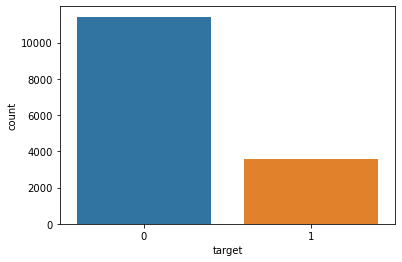

In [24]:
sns.countplot(x = y);

Como podemos visualizar, nosso target está bem desbalanceado. Por conta disso, vamos utilizar um método de balanceamento chamado oversampling.

### Balanceando o dataset

In [25]:
smt = SMOTE()

In [26]:
X, y = smt.fit_resample(X, y)

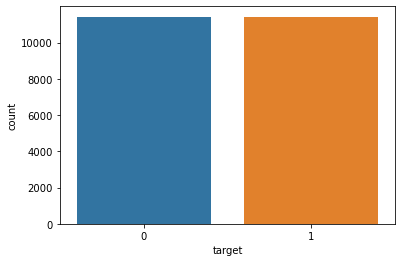

In [27]:
sns.countplot(x = y);

### Comparando diversos modelos preditivos pela acurácia

In [28]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

def regressoesskfold(x, y, n):
    """Essa função retorna a acurácia média de cada modelo"""
    
    gbc = GradientBoostingClassifier()
    dtc = DecisionTreeClassifier()
    rfc = RandomForestClassifier()
    
    skfold = StratifiedKFold(n_splits = n)
    resultado_gbc = cross_val_score(gbc, x, y, cv = skfold)
    resultado_dtc = cross_val_score(dtc, x, y, cv = skfold)
    resultado_rfc = cross_val_score(rfc, x, y, cv = skfold)
    
    print(f'SKFold Gradient: {resultado_gbc.mean()}\nSKFold Decision Tree: {resultado_dtc.mean()}\nSKFold Random Forest: {resultado_rfc.mean()}')

In [29]:
regressoesskfold(X, y, 5)

SKFold Gradient: 0.9566414937030269
SKFold Decision Tree: 0.9667048893007824
SKFold Random Forest: 0.9852120131231683


### Criando a máquina preditiva

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

modelo = RandomForestClassifier()

### Treinando a máquina preditiva

In [31]:
modelo.fit(X_train, y_train)
resultado = modelo.score(X_test, y_test)
print('Acurácia: ', resultado)

Acurácia:  0.9870205629283944


### Usando a máquina para prever os colaboradores

In [32]:
predicao = modelo.predict(X_test)
predicao

array([0, 1, 0, ..., 0, 0, 1], dtype=int64)

### Criando a confusion matrix

In [33]:
from sklearn.metrics import confusion_matrix

matriz = confusion_matrix(y_test, predicao)
print(matriz)

[[3416   22]
 [  67 3352]]


### Criando um mapa de calor para a matriz de confusão

Text(0.5, 15.0, 'Valor previsto')

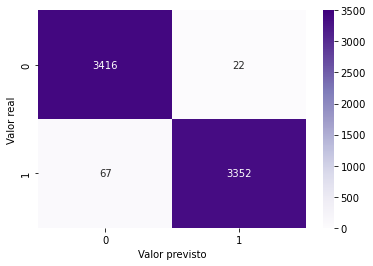

In [34]:
sns.heatmap(matriz, vmin = 0, vmax = 3500, annot = True, cmap = 'Purples', fmt='.5g');
plt.ylabel('Valor real')
plt.xlabel('Valor previsto')